# Ex 1: Implement kmean algorithm by Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import datasets

In [2]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

# Ex 2: Create at least three toy dataset 
(https://scikit-learn.org/stable/datasets/sample_generators.html), then apply kmean algorithm built in the first question? 
Try different number of cluster to see how the result change?

In [3]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 3, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 3, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 3, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

In [4]:
np.random.seed(17)
means = [[3, 3], [7, 4], [8, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

data1 = np.concatenate((X0, X1, X2), axis = 0)
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

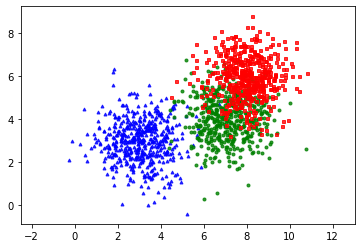

In [5]:
kmeans_display(data1, original_label)

Centers found by our algorithm:
[[3.03542018 2.99123303]
 [8.02169249 6.07465432]
 [7.05657184 3.89619137]]


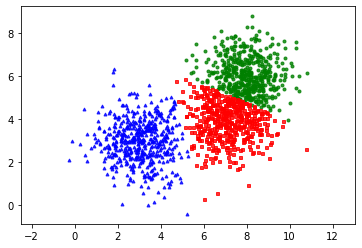

In [6]:
(centers, labels, it) = kmeans(data1, K=3)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(data1, labels[-1])

### dataset 1

Centers found by our algorithm:
[[ 2.81244767  3.37927171]
 [ 9.8241101  -8.49414149]
 [ 8.6181088   2.80678549]]


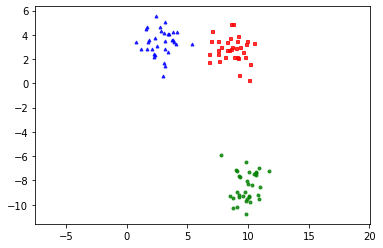

Centers found by our algorithm:
[[10.28066761 -9.52596765]
 [ 9.11729703 -9.44380636]
 [ 5.71527824  3.0930286 ]
 [ 9.96487885 -7.37955279]]


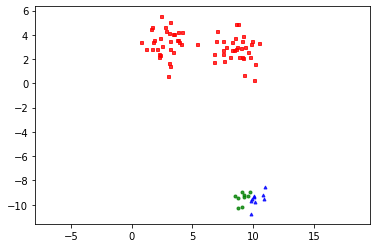

Centers found by our algorithm:
[[ 9.62596529 -9.53867043]
 [10.02225491 -7.44961256]
 [ 2.27732864  2.52825713]
 [ 3.2583802   4.08845052]
 [ 8.6181088   2.80678549]]


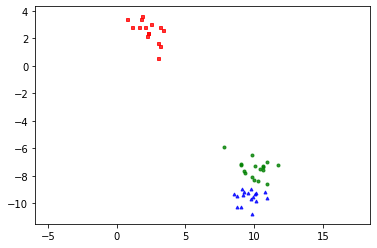

In [7]:
# creating a dataset for clustering
X_1, y = datasets.make_blobs()
for i in range(3,6):
    (centers, labels, it) = kmeans(X_1, K=i)
    print('Centers found by our algorithm:')
    print(centers[-1])
    kmeans_display(X_1, labels[-1])

### dataset 2

Centers found by our algorithm:
[[ 3.60036073 -1.84039833]
 [ 1.60759089 -4.49358197]
 [ 0.84579669 -2.0356623 ]]


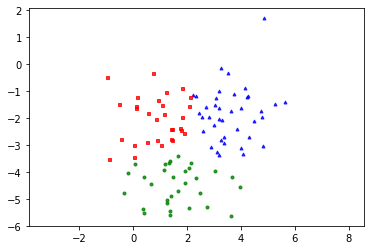

Centers found by our algorithm:
[[ 3.14781235 -1.18327568]
 [ 3.84871257 -2.76779868]
 [ 1.39916487 -4.52148213]
 [ 0.71760406 -2.12733459]]


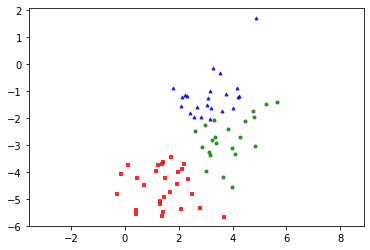

Centers found by our algorithm:
[[ 1.44868727 -4.5512085 ]
 [ 4.32685259 -1.08550814]
 [ 0.62734793 -2.31397925]
 [ 3.4963046  -3.01291645]
 [ 2.33222581 -1.37404526]]


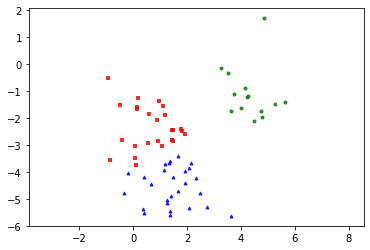

In [8]:
X_2, y = datasets.make_blobs()
for i in range(3,6):
    (centers, labels, it) = kmeans(X_2, K=i)
    print('Centers found by our algorithm:')
    print(centers[-1])
    kmeans_display(X_2, labels[-1])

### dataset 3

Centers found by our algorithm:
[[-3.29561691  6.79961237]
 [ 8.31012423 10.33448401]
 [ 8.76341659  8.46227421]]


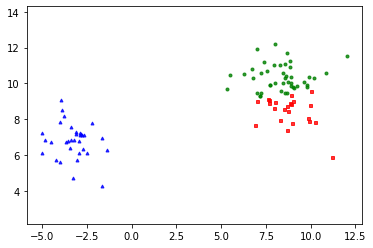

Centers found by our algorithm:
[[-3.00300692  7.24672823]
 [ 9.10233884  8.24690494]
 [-3.80768441  6.01715962]
 [ 8.24928575 10.18304439]]


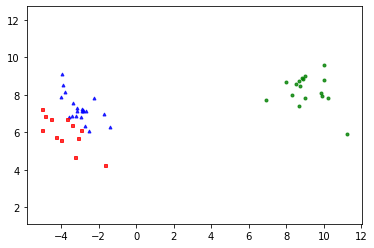

Centers found by our algorithm:
[[-3.29561691  6.79961237]
 [ 8.63273011 10.35024114]
 [ 9.27509287  8.16214105]
 [10.27731951 10.2603212 ]
 [ 7.11733632  9.77006877]]


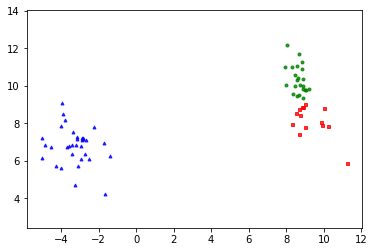

In [9]:
X_3, y = datasets.make_blobs()
for i in range(3,6):
    (centers, labels, it) = kmeans(X_3, K=i)
    print('Centers found by our algorithm:')
    print(centers[-1])
    kmeans_display(X_3, labels[-1])

# Ex 3: Read and understand how to choose k. Then, draw the elbow for the above dataset.
(https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/), 

In [10]:
def plot_elbow(data):    
    Sum_of_squared_distances = []
    K = range(1,10)
    for num_clusters in K :
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(data)
        Sum_of_squared_distances.append(kmeans.inertia_)
    plt.plot(K,Sum_of_squared_distances,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Sum of squared distances/Inertia') 
    plt.title('Elbow Method For Optimal k')
    plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


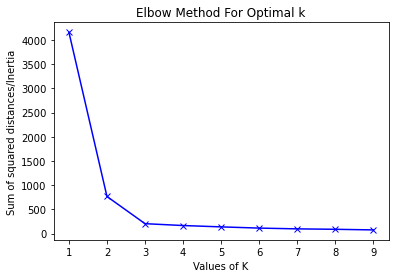

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


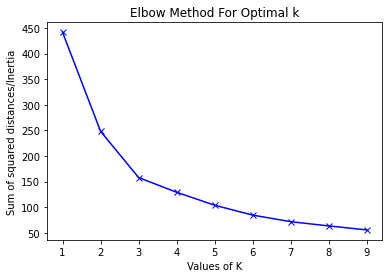

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


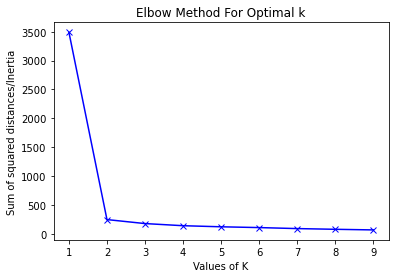

In [11]:
datasets = [X_1, X_2, X_3]
for data in datasets:
    plot_elbow(data)

# Ex 4: Read the limitation of kmean, find at least three example k-mean doesn't work.
(https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages)

### example 1: Kmean struggles when one cluster exists within another
Because it requires linear cluster boundaries so in some irregular datasets, Kmean cannot give best performance

Centers found by our algorithm:
[[-0.28323668 -0.54762373]
 [-0.34026031  0.53376515]
 [ 0.62475415  0.04399628]]


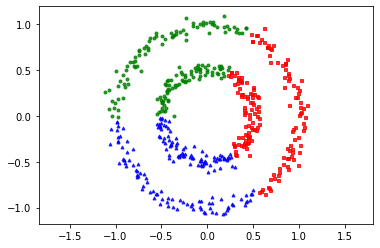

In [12]:
from sklearn import datasets
X, y = datasets.make_circles(n_samples=500, noise=0.05,factor=0.5, random_state=0)
(centers, labels, it) = kmeans(X, K=3)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])

### example 2: choosing K (number of clusters) manually raises problem about too few or too much cluster needed

Centers found by our algorithm:
[[-1.26551713  7.7693112 ]
 [ 1.97306689  0.84915787]
 [-0.32224425  3.6089909 ]]


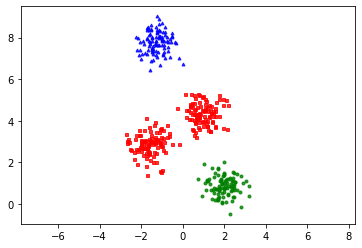

In [13]:
X, y = datasets.make_blobs(n_samples=400, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
(centers, labels, it) = kmeans(X, K=3)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])

### example 3: Sensitive to outlier.
Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. Consider removing or clipping outliers before clustering.

Centers found by our algorithm:
[[ 3.67937808 -2.00431044]
 [ 1.02577149 -1.88041945]
 [ 1.33401281 -4.43760498]]


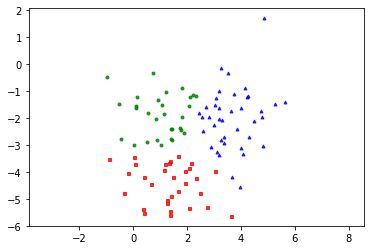

In [14]:
(centers, labels, it) = kmeans(X_2, K=3)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X_2, labels[-1])